# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [50]:
# Import numpy and pandas
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

from pandas.plotting import lag_plot

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARMA

from statsmodels.tools.eval_measures import rmse


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
# Your code here:

sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [8]:
# Your code here:

sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [14]:
# Your code here:
index = pd.date_range(start = '1/1/2018 00:00:00', end = '1/1/2018 00:29:10', periods = sensor.shape[0])
index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [13]:
# Your code here:
sensor.set_index(index, inplace = True)
sensor

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
2018-01-01 00:29:09,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

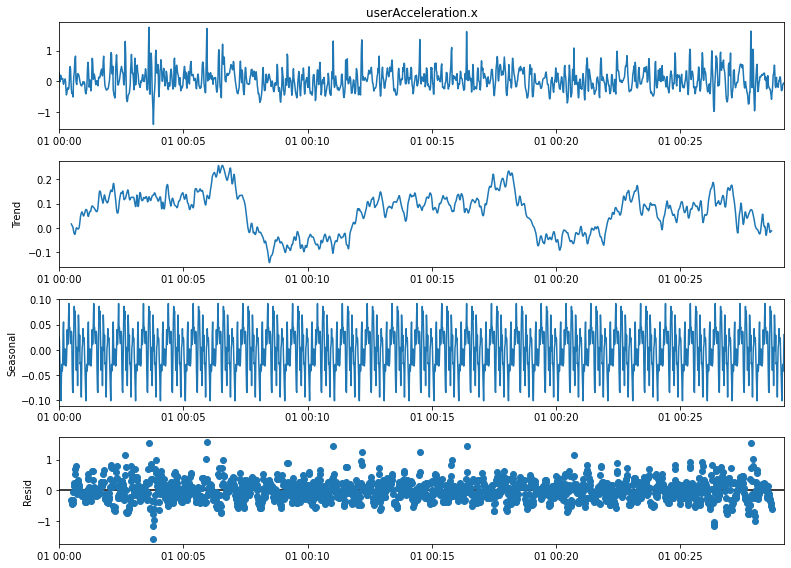

In [25]:
#Tamaño d graf
plt.rcParams['figure.figsize'] = 11,8

#Esto regresa un objeto con series para actual, trend, seasonal, residual
decomposition = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], model = 'additive', period = 60
                                         )

#Esto grafica las series del objeto
decomposition.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

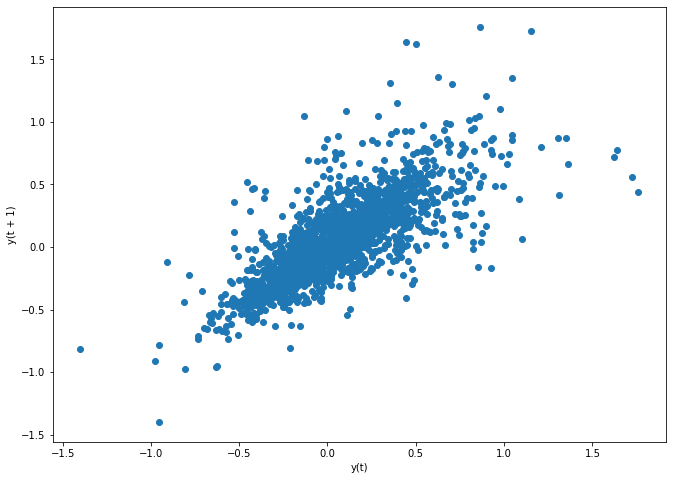

In [29]:
# Your code here:

lag_plot(sensor['userAcceleration.x']);


Create a lag plot for `rotationRate.x`

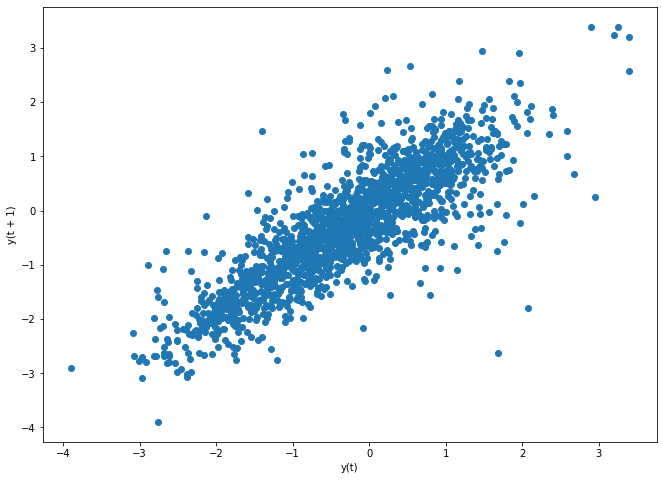

In [30]:
# Your code here:

lag_plot(sensor['rotationRate.x']);


What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:

# Both variables have moderate autocorrelation, since the future value increases depending on the current value

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [35]:
# Your code here:

for col in ['userAcceleration.x','rotationRate.x']:
    dftest = adfuller(sensor[col], autolag = None)
    dftest
    # imprimo los valores d la prueba de fuller
    # el primero es el valor del estadistico
    # mientras mas neegativo sea es mas probable rechazar 0
    print(f'Prueba estadistica {dftest[0]}\n')
    # el segundo es el valor P
    print(f'P-value  {dftest[1]}\n')
    # niveles de significancia 
    for k, v in dftest[4].items():
        print('\t{}:{} Los datos son {} estacionarios con {}% de confianza'.format(k, v, "not" if v < dftest[0] else "", 100-int(k[:-1])))

    print('\nYa que nuestra prueba estadistica es menor que el valor de significancia en 1% sabemos\nque con una confianza mayor a 99% nuestros datos SI son estacionarios')


Prueba estadistica -8.160095026835933

P-value  9.19314770571882e-13

	1%:-3.4341465551936534 Los datos son  estacionarios con 99% de confianza
	5%:-2.863216966926812 Los datos son  estacionarios con 95% de confianza
	10%:-2.567662770090317 Los datos son  estacionarios con 90% de confianza

Ya que nuestra prueba estadistica es menor que el valor de significancia en 1% sabemos
que con una confianza mayor a 99% nuestros datos SI son estacionarios
Prueba estadistica -5.26986062508642

P-value  6.320230335912249e-06

	1%:-3.4341465551936534 Los datos son  estacionarios con 99% de confianza
	5%:-2.863216966926812 Los datos son  estacionarios con 95% de confianza
	10%:-2.567662770090317 Los datos son  estacionarios con 90% de confianza

Ya que nuestra prueba estadistica es menor que el valor de significancia en 1% sabemos
que con una confianza mayor a 99% nuestros datos SI son estacionarios


What are your conclusions from this test?

In [13]:
# Your conclusions here:

# Both variables are stationary with a confidence higher than 99.99%

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [72]:
# Your code here:

model = ARMA(sensor['userAcceleration.x'], order=(2, 1))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(len(sensor['userAcceleration.x'])-9, len(sensor['userAcceleration.x'])-1)


/Users/chemaramos/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


In [73]:
predictions

2018-01-01 00:29:02    0.115159
2018-01-01 00:29:03   -0.008270
2018-01-01 00:29:04   -0.186762
2018-01-01 00:29:05   -0.229210
2018-01-01 00:29:06   -0.136440
2018-01-01 00:29:07   -0.162658
2018-01-01 00:29:08    0.035719
2018-01-01 00:29:09   -0.043530
2018-01-01 00:29:10    0.008415
Freq: S, dtype: float64

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [83]:
# Your code here:


RMSE = rmse(predictions,sensor['userAcceleration.x'][-9:] , axis=0)
RMSE

0.09860950342337134

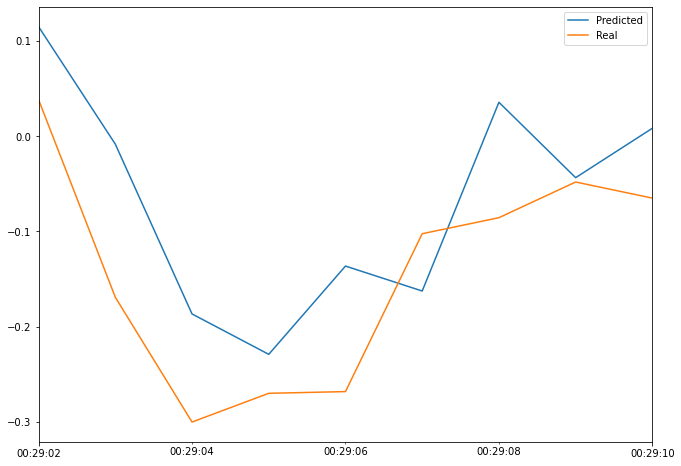

In [94]:
compare = pd.DataFrame([predictions,sensor['userAcceleration.x'][-9:]], index =['Predicted','Real']).T
compare.plot();